In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import scipy.stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('data_preprocessed.csv')

In [ ]:
# custom_palette = sns.color_palette(["#3962FA", "#6B89FB", "#F26969", "#ED3737"])

<h2>Распределение возраста</h2>

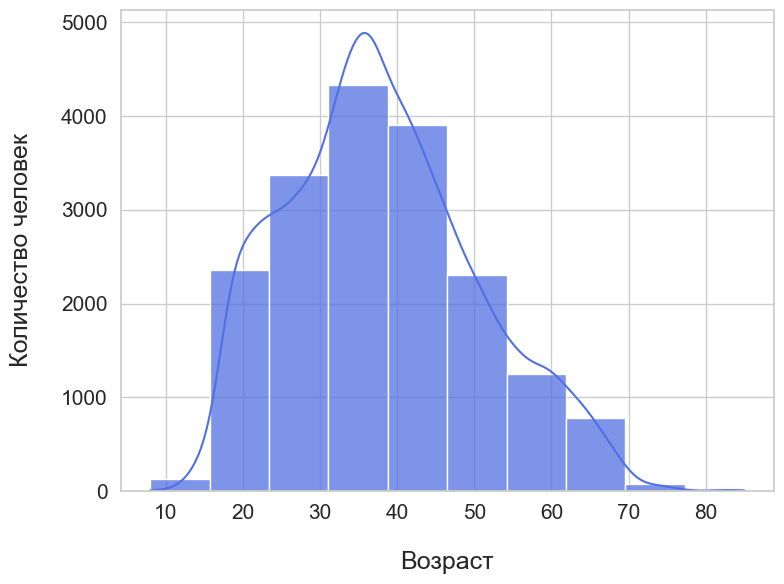

In [132]:
plt.figure(figsize=(8, 6))

sns.histplot(df['age'], bins=10, kde=True, color="#5170E2", alpha=0.75) #  "#3962FA"-"#5170E2"    "#ED3737"-"#D64E4E"

plt.xlabel('Возраст', fontsize=18, labelpad=20.0)
plt.ylabel('Количество человек', fontsize=18, labelpad=20.0)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

In [175]:
df['gender_cd'] =df['gender_cd'].map({1.0: 'Мужчина', 0.0: 'Женщина'})
df.rename({'gender_cd':'Пол клиента'}, axis=1, inplace=True)

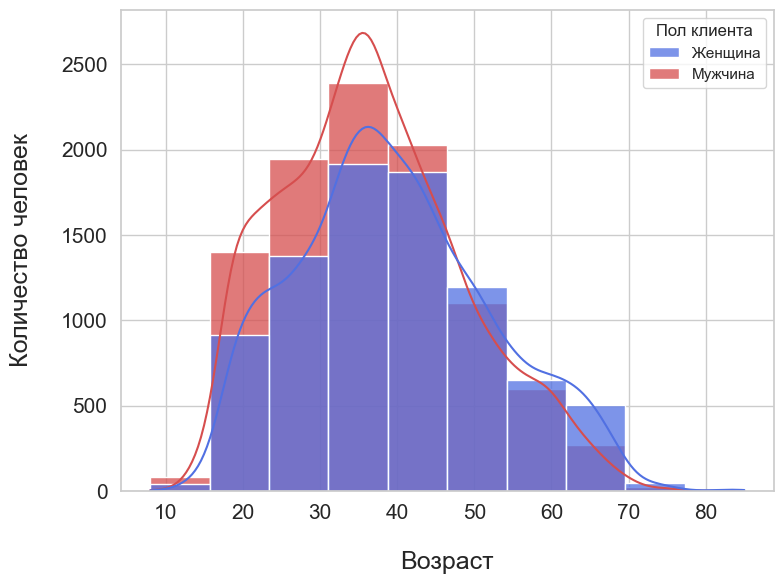

In [176]:
df['gender_cd'] =df['gender_cd'].map({1.0: 'Мужчина', 0.0: 'Женщина'})
df.rename({'gender_cd':'Пол клиента'}, axis=1, inplace=True)

plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='age', bins=10, kde=True, hue='Пол клиента',
             palette=["#5170E2", "#D64E4E"], alpha=0.75)

plt.xlabel('Возраст', fontsize=18, labelpad=20.0)
plt.ylabel('Количество человек', fontsize=18, labelpad=20.0)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

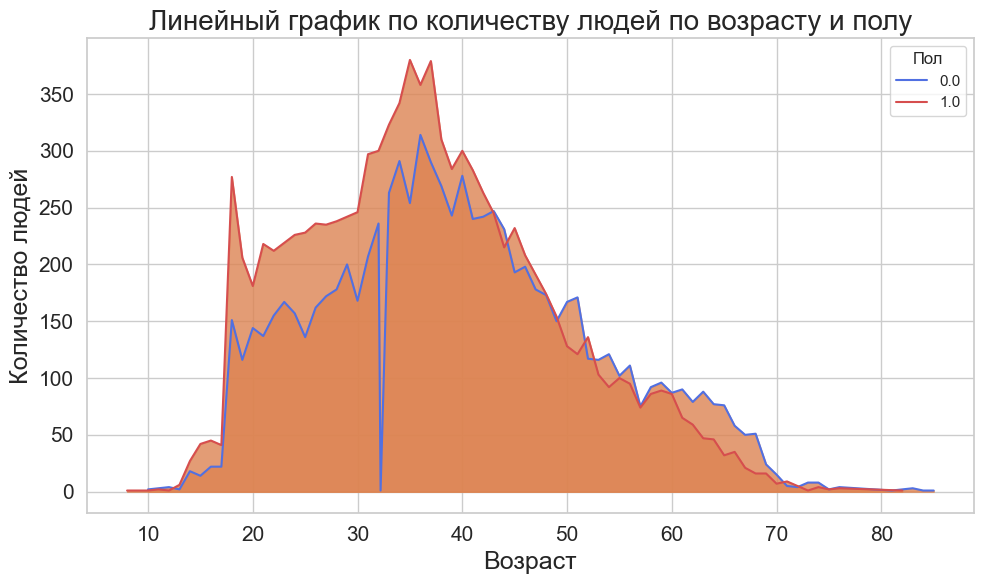

In [158]:
age_gender_counts = df.groupby(['age', 'gender_cd']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))

# Создаем lineplot с разделением по полу
sns.lineplot(data=age_gender_counts, x='age', y='count', hue='gender_cd', palette=["#5170E2", "#D64E4E"])

# Добавляем заливку под линией для каждого пола
for gender in age_gender_counts['gender_cd'].unique():
    gender_df = age_gender_counts[age_gender_counts['gender_cd'] == gender]
    plt.fill_between(gender_df['age'], gender_df['count'], color=sns.color_palette()[0] if gender == 'Male' else sns.color_palette()[1], alpha=0.8)

plt.xlabel('Возраст', fontsize=18)
plt.ylabel('Количество людей', fontsize=18)
plt.title('Линейный график по количеству людей по возрасту и полу', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(title='Пол')
plt.tight_layout()
plt.show()

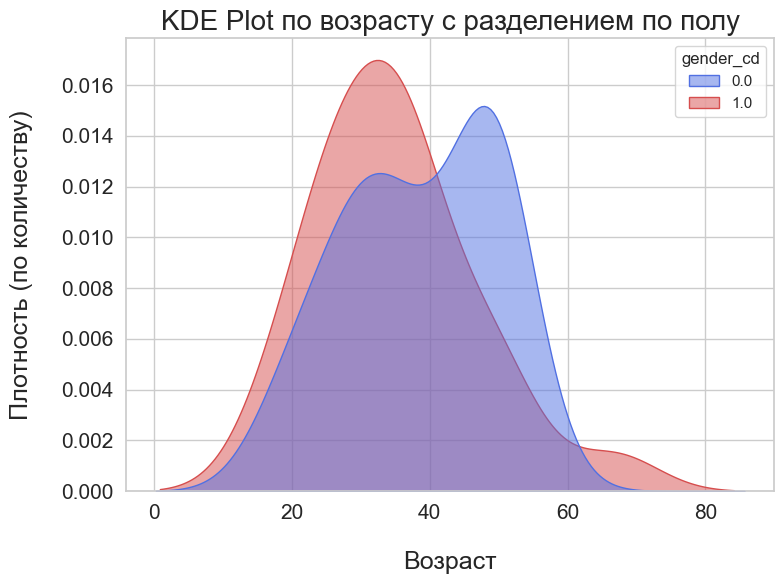

In [160]:
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

# Создаем KDE plot с цветовой дифференциацией по gender_cd
sns.kdeplot(data=df, x='age', hue='gender_cd', fill=True,
             palette=["#5170E2", "#D64E4E"], alpha=0.5, weights=age_counts)

plt.xlabel('Возраст', fontsize=18, labelpad=20.0)
plt.ylabel('Плотность (по количеству)', fontsize=18, labelpad=20.0)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('KDE Plot по возрасту с разделением по полу', fontsize=20)
plt.tight_layout()
plt.show()

In [125]:
def age_segment(age):
    if 0 <= age < 14:
        return '0-13'
    elif 14 <= age < 18:
        return '14-17'
    elif 18 <= age < 23:
        return '18-22'
    elif 22 <= age < 27:
        return '22-26'
    elif 26 <= age < 31:
        return '26-30'
    elif 31 <= age < 37:
        return '31-36'
    elif 37 <= age < 43:
        return '37-42'
    elif 43 <= age < 49:
        return '43-48'
    elif 49 <= age < 55:
        return '49-54'
    elif 55 <= age < 61:
        return '55-60'
    elif 61 <= age < 66:
        return '61-65'
    else:
        return '65+'
df['age_segment'] = df['age'].apply(age_segment)
age_order = ['0-13', '14-17', '18-22', '22-26', '26-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-65', '65+']
df['age_segment'] = pd.Categorical(df['age_segment'], categories=age_order, ordered=True)
age_segment_bar = df.sort_values(by='age', ascending=False).groupby('age_segment')['approval_flg'].mean().reset_index()

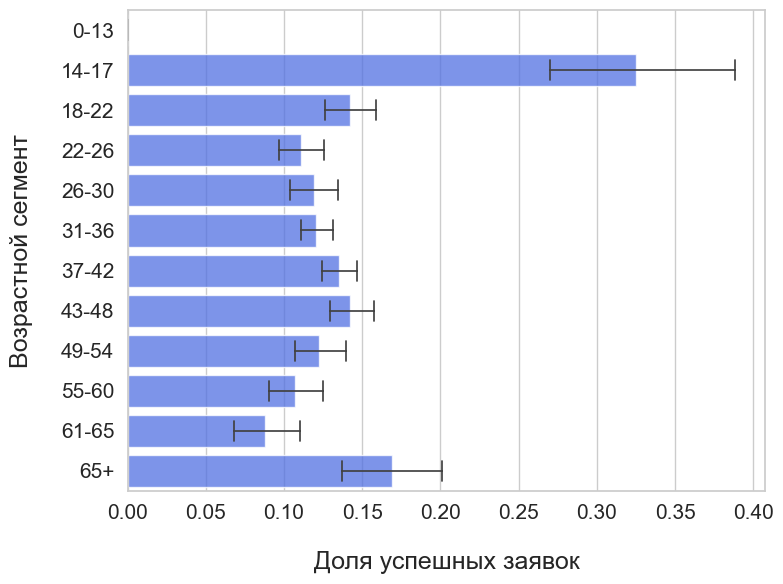

In [129]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x='approval_flg', y='age_segment', color="#3962FA", alpha=0.75, capsize=0.5, errwidth=1.25) #  "#3962FA"-"#5170E2"    "#ED3737"-"#D64E4E"

plt.xlabel('Доля успешных заявок', fontsize=18, labelpad=20.0)
plt.ylabel('Возрастной сегмент', fontsize=18, labelpad=20.0)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

<h2>Корреляции</h2>

In [138]:
df.columns

Index(['customer_id', 'age', 'gender_cd', 'region_size', 'foreign_flg',
       'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
       'child_amt', 'realty_type', 'segment_cd', 'bundle_nm',
       'confirmed_income', 'predicted_income', 'product_cd', 'functional_cd',
       'finish_dttm', 'state_talk_time_sec', 'wo_hit_status_result_desc',
       'wo_hit_status_reason_desc', 'employee_id', 'emp_age', 'emp_gender_cd',
       'emp_children_cnt', 'emp_work_months_cnt', 'emp_citizenship_country_cd',
       'emp_marital_status_cd', 'day_of_week', 'is_holiday', 'approval_flg',
       'bundle_flg', 'region_size_numeric', 'age_segment'],
      dtype='object')

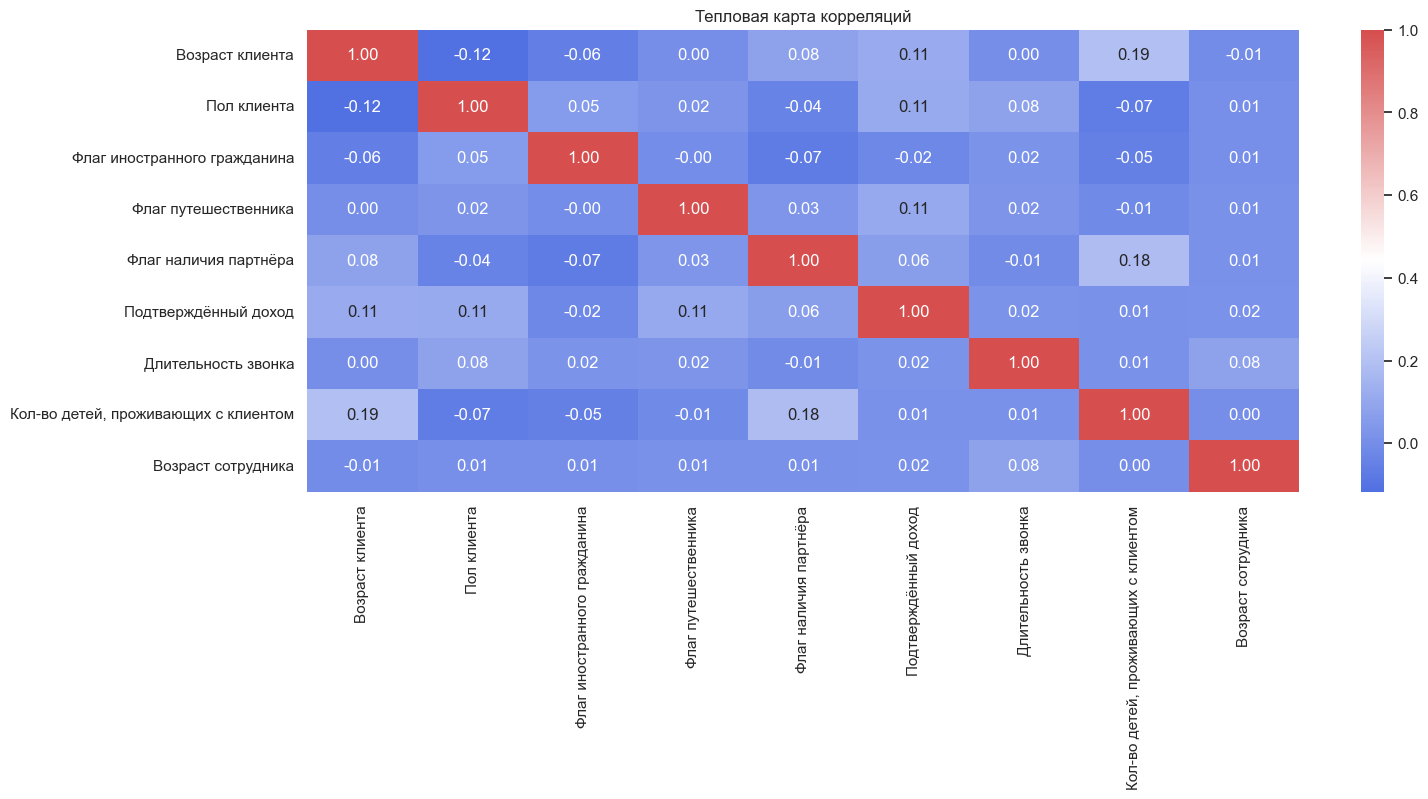

In [150]:
import matplotlib.colors as mcolors

colors = ["#5170E2", "#FFFFFF", "#D64E4E"]

cmap_name = "custom_cmap"
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

df1 = df[['age', 'gender_cd', 'foreign_flg', 'traveler_flg', 'partnership_flg', 'confirmed_income', 'state_talk_time_sec', 'child_amt', 'emp_age']]
df1.rename(columns={'age': 'Возраст клиента', 'gender_cd': 'Пол клиента', 'foreign_flg': 'Флаг иностранного гражданина', 'traveler_flg': 'Флаг путешественника', 'partnership_flg': 'Флаг наличия партнёра', 'confirmed_income': 'Подтверждённый доход', 'state_talk_time_sec': ' Длительность звонка', 'child_amt': 'Кол-во детей, проживающих с клиентом', 'emp_age': 'Возраст сотрудника'}, inplace=True)
correlation_matrix = df1.corr(numeric_only=True)

plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()


<h2>Остальное</h2>

In [4]:
df['finish_dttm'] = pd.to_datetime(df['finish_dttm']).dt.strftime('%Y-%m')
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])

In [5]:
line_df = df.groupby('finish_dttm')['approval_flg'].mean().reset_index()
line_df

,finish_dttm,approval_flg
0,2022-01-01,0.172881
1,2022-02-01,0.130719
2,2022-03-01,0.300813
3,2022-04-01,0.262857
4,2022-05-01,0.245283
5,2022-06-01,0.158333
6,2022-07-01,0.176638
7,2022-08-01,0.129108
8,2022-09-01,0.200514
9,2022-10-01,0.222222


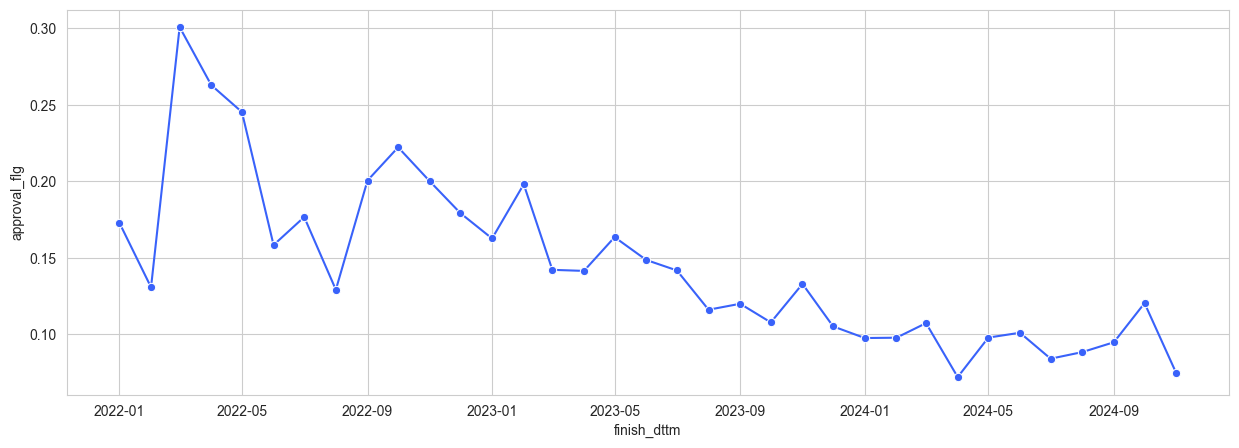

In [16]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=line_df, x='finish_dttm', y='approval_flg', marker='o', color="#3962FA")
plt.show()
